In [1]:
import librosa
import librosa.display

import numpy as np
import matplotlib.pyplot as plt

import os

In [2]:
def audio2beats(filename):
    name=filename.split(".")[0]
    if not os.path.exists(name):
        os.mkdir(name)
    
    plt.figure(figsize=(100,100),dpi=1)
    
    y, sr = librosa.load(filename)
    
    hop_length = 512
    onset_env = librosa.onset.onset_strength(y, sr=sr, aggregate=np.median)
    pulse = librosa.beat.plp(onset_envelope=onset_env, sr=sr,hop_length=hop_length)
    beats_plp = np.flatnonzero(librosa.util.localmax(pulse))
    
    hop_length2 = 128
    
    M = librosa.feature.melspectrogram(y=y, sr=sr, hop_length=hop_length2)
    
    librosa.display.specshow(librosa.power_to_db(M, ref=np.max),
                             y_axis='mel', x_axis='frames', hop_length=hop_length2)

    plt.axis('off')

    idx=1
    for i in range(len(beats_plp)-1):
        plt.xlim(beats_plp[i]*hop_length/hop_length2,beats_plp[i+1]*hop_length/hop_length2)
        plt.savefig(name+'\\'+str(idx)+'.png', bbox_inches='tight', pad_inches=0)
        idx+=1

In [17]:
def visualize_beats(filename):
    y, sr = librosa.load(filename)
    
    onset_env = librosa.onset.onset_strength(y, sr=sr, aggregate=np.median)
    tempo, beats = librosa.beat.beat_track(onset_envelope=onset_env, sr=sr, hop_length = 512)
    pulse = librosa.beat.plp(onset_envelope=onset_env, sr=sr,hop_length=512)
    beats_plp = np.flatnonzero(librosa.util.localmax(pulse))
    
    fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(60,20))
    times = librosa.times_like(onset_env, sr=sr)
    ax[0].plot(times, librosa.util.normalize(onset_env),
             label='Onset strength')
    ax[0].vlines(times[beats], 0, 1, alpha=0.5, color='r',
               linestyle='--', label='Beats')
    ax[0].legend()
    ax[0].set(title='librosa.beat.beat_track')
    ax[0].label_outer()
    # Limit the plot to a 15-second window
    times = librosa.times_like(pulse, sr=sr)
    ax[1].plot(times, librosa.util.normalize(pulse),
             label='PLP')
    ax[1].vlines(times[beats_plp], 0, 1, alpha=0.5, color='r',
               linestyle='--', label='PLP Beats')
    ax[1].legend()
    ax[1].set(title='librosa.beat.plp')
    ax[1].xaxis.set_major_formatter(librosa.display.TimeFormatter())

C:\ProgramData\Anaconda3\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


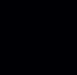

In [4]:
audio2beats("coolest hand wash.mp3")

C:\ProgramData\Anaconda3\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


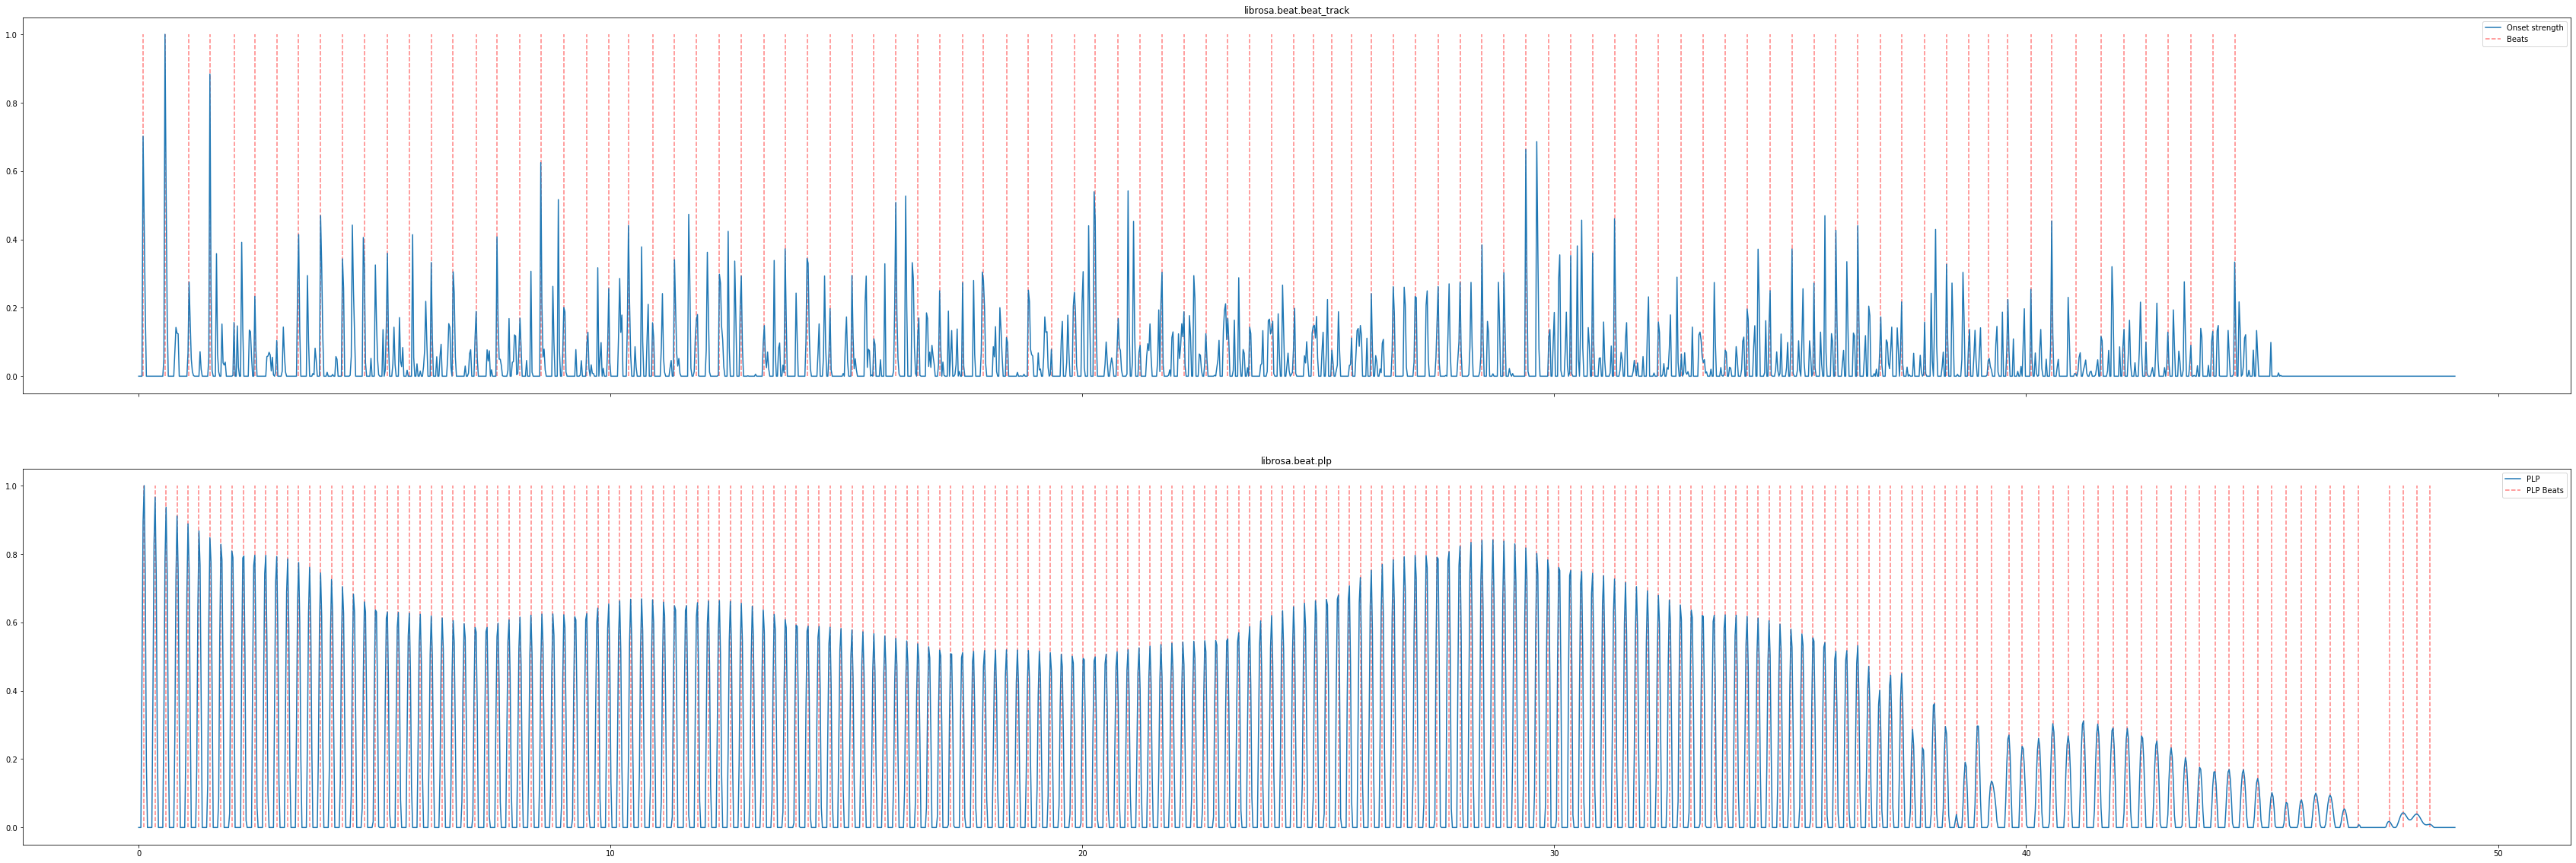

In [18]:
visualize_beats("coolest hand wash.mp3")

In [53]:
def beats_from_beatmap(filename):
    with open (filename, "r", encoding="utf-8") as file:
        data=file.readlines()
        
    data=data[data.index("[HitObjects]\n")+1:]
    
    timings=[]
    sounds=[]

    for i in data:
        i=i.split(",")
        if (i[3]=="1"):
            timings.append(int(i[2]))
            sounds.append(int(i[4]))
            
    return (timings,sounds)

In [54]:
timings,sounds=beats_from_beatmap("YOASOBI - Yoru ni Kakeru (Charlotte) [Inner Oni].osu")

In [55]:
timings[len(timings)-10:]

[255922,
 256038,
 256153,
 256268,
 256384,
 256499,
 256614,
 256730,
 257076,
 257422]

In [56]:
timings=[x/1000 for x in timings]

C:\ProgramData\Anaconda3\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


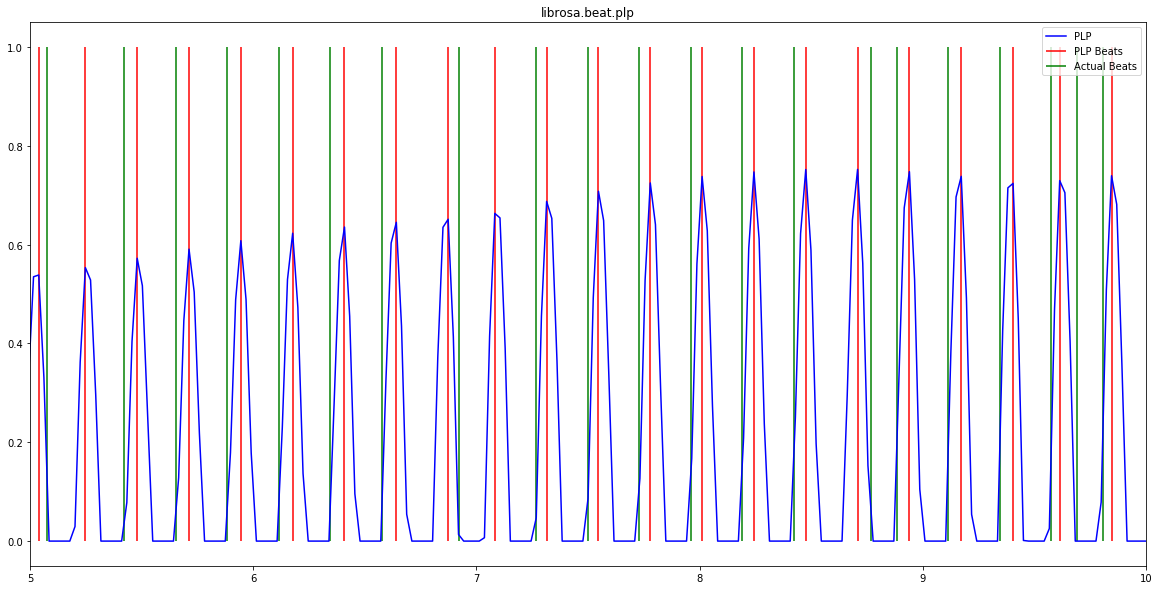

In [65]:
y, sr = librosa.load("yoru_ni_kakeru.mp3")

onset_env = librosa.onset.onset_strength(y, sr=sr, aggregate=np.median)
tempo, beats = librosa.beat.beat_track(onset_envelope=onset_env, sr=sr, hop_length = 512)
pulse = librosa.beat.plp(onset_envelope=onset_env, sr=sr,hop_length = 512)
beats_plp = np.flatnonzero(librosa.util.localmax(pulse))

fig, ax = plt.subplots(nrows=1, figsize=(20,10))
times = librosa.times_like(pulse, sr=sr)
ax.plot(times, librosa.util.normalize(pulse),color='b',
         label='PLP')
ax.vlines(times[beats_plp], 0, 1, alpha=1, color='r',
           linestyle='-', label='PLP Beats')
ax.vlines(timings, 0, 1, alpha=1, color='g',
           linestyle='-', label='Actual Beats')
ax.legend()
ax.set(title='librosa.beat.plp')
ax.set(xlim=(5,10))
ax.xaxis.set_major_formatter(librosa.display.TimeFormatter())

C:\ProgramData\Anaconda3\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


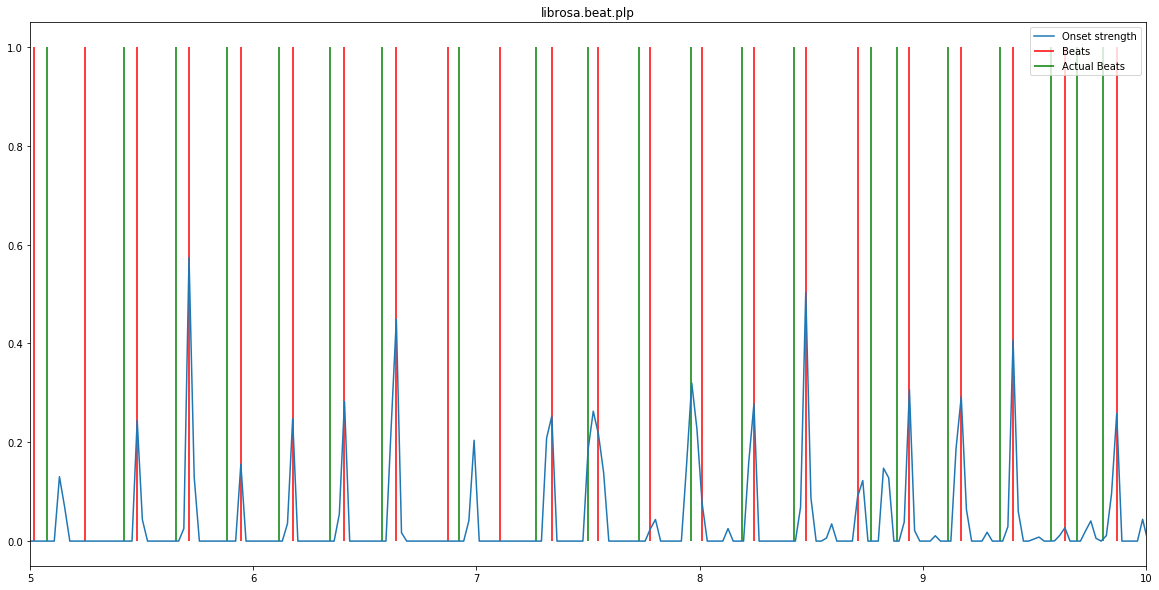

In [60]:
y, sr = librosa.load("yoru_ni_kakeru.mp3")

onset_env = librosa.onset.onset_strength(y, sr=sr, aggregate=np.median)
tempo, beats = librosa.beat.beat_track(onset_envelope=onset_env, sr=sr, hop_length = 1024)
pulse = librosa.beat.plp(onset_envelope=onset_env, sr=sr,hop_length=1024)
beats_plp = np.flatnonzero(librosa.util.localmax(pulse))

fig, ax = plt.subplots(nrows=1, figsize=(20,10))
times = librosa.times_like(pulse, sr=sr)
ax.plot(times, librosa.util.normalize(onset_env),
             label='Onset strength')
ax.vlines(times[beats], 0, 1, alpha=1, color='r',
               linestyle='-', label='Beats')
ax.vlines(timings, 0, 1, alpha=1, color='g',
           linestyle='-', label='Actual Beats')
ax.legend()
ax.set(title='librosa.beat.plp')
ax.set(xlim=(5,10))
ax.xaxis.set_major_formatter(librosa.display.TimeFormatter())